# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

### *Import Libraries

In [356]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

### *Connect Database

In [394]:
os.path.isfile("baseball.sqlite")
db = sql.connect("baseball.sqlite")

### 1.1.1 Top Five Payroll Teams

#### *Data Connection:

In [358]:
# Connect to the dataset which contains top-five teams with the highest payrolls:
data_sal=pd.read_sql("""
        SELECT DISTINCT new.teamID, new.name, new.yearID, MAX(new.team_salary) AS max_salary FROM
           (SELECT DISTINCT a.teamID, a.team_salary, a.yearID, Teams.name FROM
                (SELECT SUM(salary) AS team_salary, yearID, teamID FROM Salaries 
                 WHERE yearID BETWEEN 2006 AND 2016
                 GROUP BY yearID, teamID
                 ORDER BY team_salary DESC
              )  AS a
            LEFT JOIN Teams
            ON a.teamID=Teams.teamID and
               a.yearID=Teams.yearID) AS new
        GROUP BY teamID
        ORDER BY max_salary DESC
        LIMIT 5
        """, db)

#### *Team Result:

In [359]:
# Print the top-five teams names and related informations.
data_sal

,teamID,name,yearID,max_salary
0,NYA,New York Yankees,2013,231978886
1,LAN,Los Angeles Dodgers,2013,223362196
2,DET,Detroit Tigers,2016,194876481
3,BOS,Boston Red Sox,2016,188545761
4,PHI,Philadelphia Phillies,2014,180944967


#### *Method Discussion(SQL):

**From 2006 to 2016, 5 teams which had the highest payrolls are "New York Yankees", "Los Angeles Dodgers", "Detroit Tigers", "Boston Red Sox" and "Philadelphia Phillies". We reached the result by first calcualting the different combinations team payrolls in each year from 2006 to 2016, and then use the MAX() function to find the maximum value of team payrolls for each team. Then we ordered our dataset by those maximums and we finally had the top five teams as result.**

### 1.1.2  General Trend of Payrolls from 2006 to 2016

### *Data Connection:

#### --1.Top-Five Teams:--

In [360]:
# Data top_five team payrolls:
data_toppay=pd.read_sql("""
               SELECT DISTINCT a.teamID, a.team_salary, a.yearID, Teams.name FROM
                    (SELECT SUM(salary) AS team_salary, yearID, teamID FROM Salaries 
                        WHERE yearID BETWEEN 2006 AND 2016
                        GROUP BY yearID, teamID
                        HAVING teamID IN('NYA', 'LAN', 'DET', 'BOS', 'PHI')
                        ORDER BY yearID 
                     )  AS a
                 LEFT JOIN Teams
                 ON a.teamID=Teams.teamID and
                    a.yearID=Teams.yearID 
            """ , db)

#### --2. Total-Average:--

In [361]:
# Data total_average team payrolls:
data_avg=pd.read_sql("""
            SELECT AVG(new.team_salary) AS team_avg_payroll, new.yearID FROM
                (SELECT DISTINCT a.teamID, a.team_salary, a.yearID, Teams.name FROM
                    (SELECT SUM(salary) AS team_salary, yearID, teamID FROM Salaries 
                        WHERE yearID BETWEEN 2006 AND 2016
                        GROUP BY yearID, teamID
                        HAVING teamID IN('NYA', 'LAN', 'DET', 'BOS', 'PHI')
                        ORDER BY yearID 
                     )  AS a
                 LEFT JOIN Teams
                 ON a.teamID=Teams.teamID and
                    a.yearID=Teams.yearID) AS new
            GROUP BY yearID
            """ , db)

### *Data Visualization:

#### --1.Top-Five Teams:--

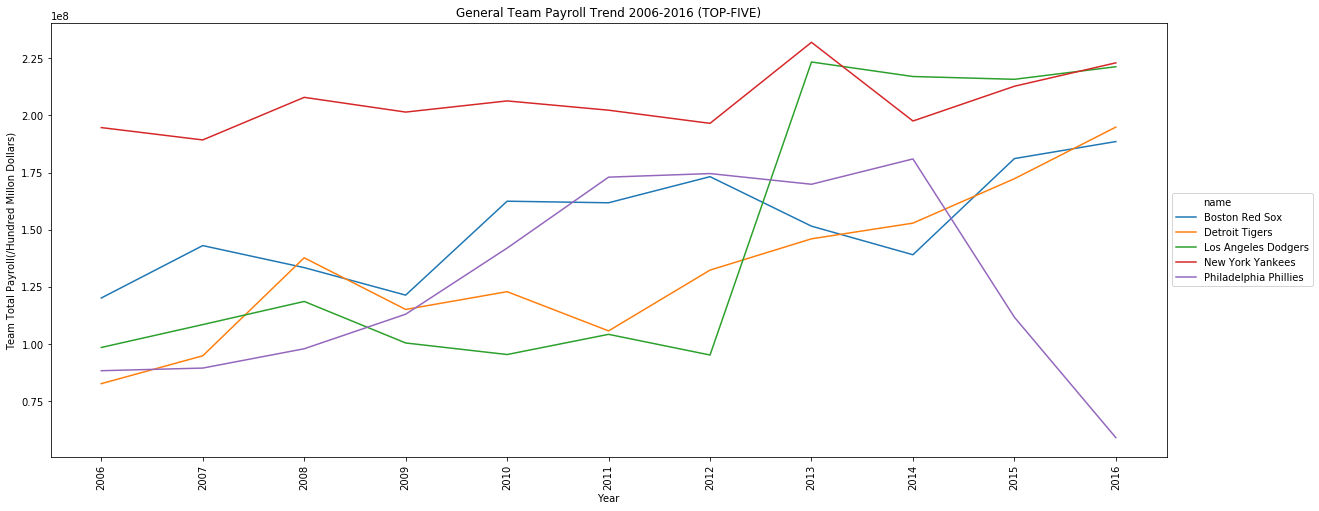

In [362]:
# Plot a lineplot that reflect the general trend of top five teams
plt.figure(figsize=(20, 8))
ax = sns.lineplot("yearID", "team_salary", hue = "name", data = data_toppay)
ax.set_title("General Team Payroll Trend 2006-2016 (TOP-FIVE)")
ax.set_xlabel("Year")
ax.set_ylabel("Team Total Payroll(/Hundred Millon Dollars)")

# Adjust the legend
for name in ax.get_xticklabels():
    name.set_rotation("vertical")
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Show full range of Years
ax.set_xticks(range(2006,2017))
ax

#### --2. Average-Top-Five:--

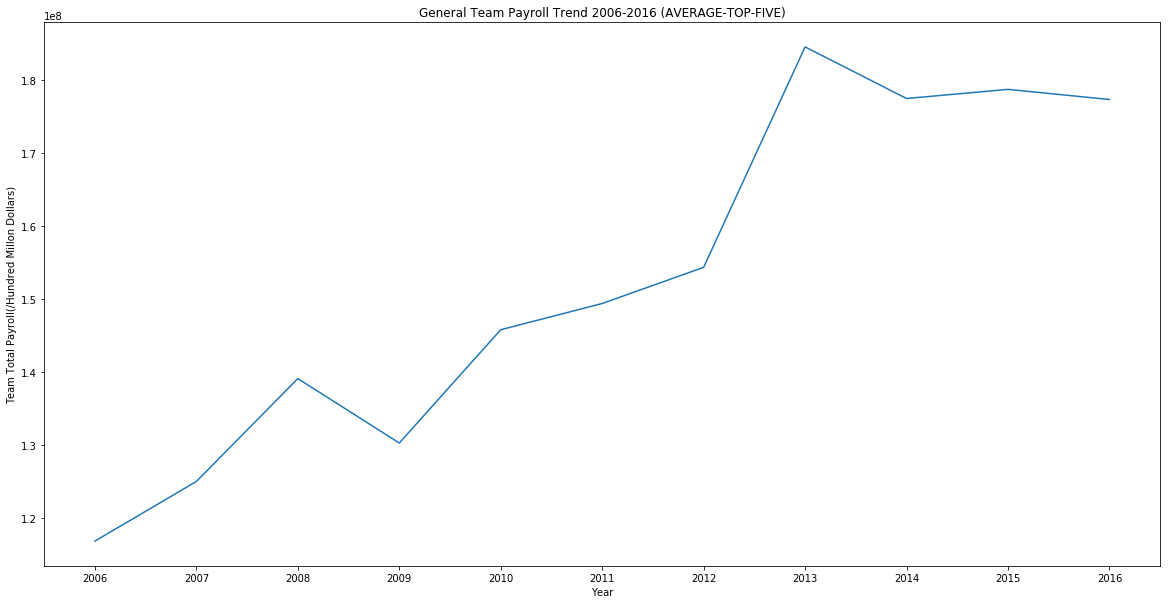

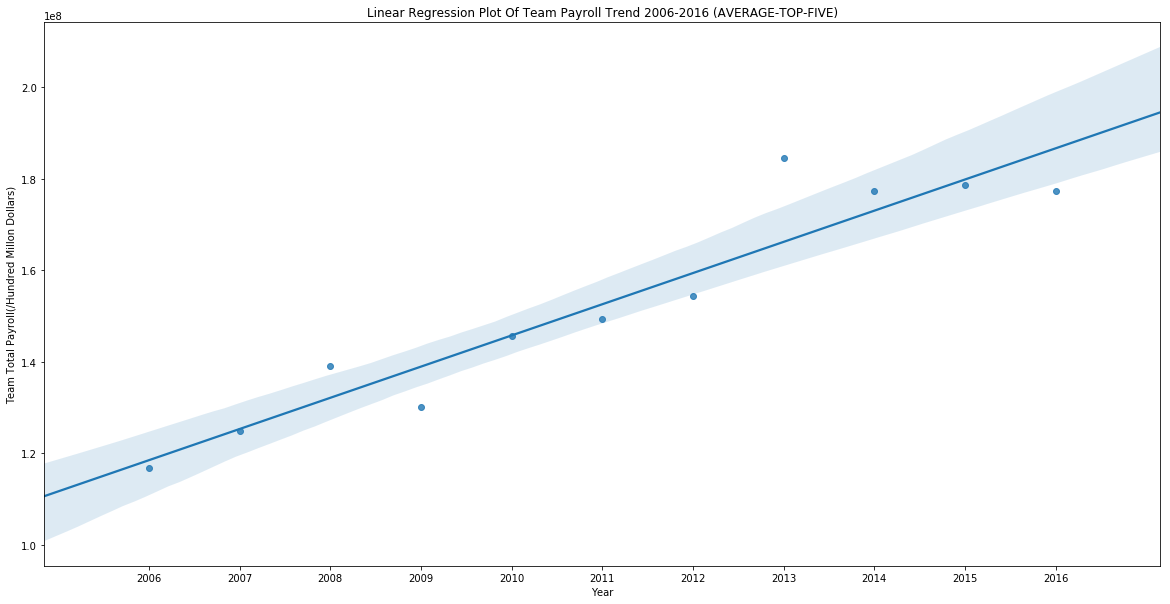

In [377]:
# 1.Plot a line-plot that reflect the general trend of total average of top-five teams
plt.figure(figsize=(20, 10))
ax1 = sns.lineplot("yearID", "team_avg_payroll", data = data_avg)

# Add plot titles
ax1.set_title("General Team Payroll Trend 2006-2016 (AVERAGE-TOP-FIVE)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Team Total Payroll(/Hundred Millon Dollars)")

# Show full range of Years
ax1.set_xticks(range(2006,2017))
ax1

# 2.Plot a Regression-plot that reflect the general trend of total average of top-five teams
plt.figure(figsize=(20, 10))
ax_lm = sns.regplot("yearID", "team_avg_payroll", data = data_avg)

# Add plot titles
ax_lm.set_title("Linear Regression Plot Of Team Payroll Trend 2006-2016 (AVERAGE-TOP-FIVE)")
ax_lm.set_xlabel("Year")
ax_lm.set_ylabel("Team Total Payroll(/Hundred Millon Dollars)")

# Show full range of Years
ax_lm.set_xticks(range(2006,2017))
ax_lm

### *Trend Exploration:

To explore the general trend of payrolls from 2006 to 2016, we connect **two groups of dataset.** One is related to the **top five teams with the highest total payroll each year**, the other one is related to the **total average payroll of teams in each year**. We use the **lineplot in seaborn library** to visulaize the change over this time period.

In the first plot of top five teams individually, we find the general trend of most teams' payrolls **are increasing as the years grow.** Teams like **"New York Yankees", "Detroit Tigers" and "Boston Red Sox"** all have a slowly increasing tendency of their team payrolls over this time period. Although, we may find several samll fluctuations for the above three teams, **their final payroll values are increased.** While on the other hand, **Teams like "Los Angeles Dodgers" and "Philadelphia Phillies" have a different situation.** Those two teams faced **a large fluctuation** during the time period. More specifically, we found that from year **2012 to 2013**, the team payroll of "Los Angeles Dodgers" encounted **a extremely large increasement**, which lead it to be the 2nd position of top-five teams. While **starting from 2014 to 2016, team "Philadelphia Phillies" had a continuously significant reduction of their total payrolls.** In 2016, the final value of their team payrolls is even below the value in 2006. This fact indicates a huge fluction and changes of "Philadelphia Phillies" team.

In the second plot, we discovered the **average top-five teams payrolls for each year during the above time period(2006-2016).** Obviously, we found that the average team payrolls **are increasing as the years grow.** In this way, we could conclude that the above top-five teams individual plot is consistent with the total average plot's tendency. More specifically, we observed that from **2010 to 2013,** the value of total average team payrolls are increasing **more and more rapidly.** However, from **2006 to 2010,** it is growing **very unstablely.** By looking through the overall trend in 2nd plot, we may conclude that the there is an **approximately positive linear regression relationship** bewteen years and team payrolls. **As years grows, the total average value of team payrolls also increases.**

### 1.1.3 Anomalies Analysis (Top-Five Teams)

**By looking through the lineplot of top-five teams with the highest payrolls, we discovered that there exist several anomalies. Those special circumstances always contains a extremely large value change of team payrolls under a short time period.**

**(1)** **The first anomaly is related to the team "Los Angeles Dodgers".** From year **2012 to 2013,** we found that the whole team payroll encoutered a huge increase in this period. By searching the online resource, we understanded this sudden change is aroused by the **advent of "new era" in MLB** and also affect by **the new ownership of Magic Johnson, who purchased the team for a record** two billion dollars in 2012. More specifically, the conference is now running its busniess closely to the rule in NBA. **Instead of old-fashioned baseball trades, more and more teams start trading contracts.** In this time period, "Los Angeles Dodgers" signed many great players in the leagure, such as **Adrian Gonzalez, Carl Crawford, etc.** Those high salaries of starplayers increase the whole team payrolls. Beyond this, Dodgers also pay a great deal of money for the **existing salary obligations from other franchises.** Since it made several trade to reform their team. Moreover, we found that **the Luxury tax rate also increased rapidly at that time.** Due to the surplass of team payrolls **overpassing the tax threshold,** the "Los Angeles Dodgers" had to pay a additional amount money for the tax. In this way, we saw **an immediately huge increase in team payrolls of Dodgers from 2012 to 2013.**

***Related Links:**
.[Dodger payrolls](https://www.truebluela.com/2010/11/30/1840626/dodgers-payroll-worksheet)&nbsp;
.[MLB’s Evolving Luxury Tax](https://blogs.fangraphs.com/mlbs-evolving-luxury-tax/)&nbsp;
.[The Dodgers are out-spending everyone](https://www.businessinsider.com/dodgers-payroll-is-nuts-2015-8)

**(2)** **The second anomaly is related to the team "Philadelphia Phillies".** From year **2014 to 2016,** we found that the whole team payroll encoutered **a huge and continuous decrease over this period.** Through collecting the online statistics and information, we understanded this immediate change **is not a surprising accident, but should be a long-term problem formed years ago and the problem finnaly force the team payroll to collapse.** Overviewing the MLB's history, Philleis is always considered as a competitve team in the leagure. However, due to **the core players of team getting older** and **manager's hesitation in rebuilding the team.** Phillies struggled in their games and failed to cultivate their young generations. Moreover, Phillies are not alone in their irresponsible payroll usage. They seem simply want to win the games **immediately by signing old starplayers and ignore to develop a system for supporting the future of their team.** As a bad result, Phillies had to eat **some "large" contracts which limit their plans in that time period.** So, we observed that the team **kept losing games and their total team payroll went down.**

***Related Links:**
.[Comparing the 2010 Astros and the 2014 Phillies](https://www.beyondtheboxscore.com/2014/3/25/5536554/comparing-the-2010-astros-and-the-2014-phillies)&nbsp;
.[The Phillies Rebuilt Like The Cubs ](https://fivethirtyeight.com/features/the-phillies-rebuilt-like-the-cubs-and-astros-can-they-win-like-them/)

### 1.1.4 Top-Five Teams V.S. Others

### *Data Connection:

#### Step1. Create a temporary table in datacase

In [364]:
# To get the dataset for all teams with their team payrolls.
# *1. We created a new temporary table called table_all.
result = db.execute("""
    CREATE TEMPORARY TABLE table_all AS
      SELECT DISTINCT a.teamID, a.team_salary, a.yearID, Teams.name FROM
                          (SELECT SUM(salary) AS team_salary, yearID, teamID FROM Salaries 
                           WHERE yearID BETWEEN 2006 AND 2016
                           GROUP BY yearID, teamID
                           ORDER BY yearID 
                           )  AS a
                        LEFT JOIN Teams
                        ON a.teamID=Teams.teamID and
                           a.yearID=Teams.yearID
                    """)

# Force the database to run ("commit") the query.
# Otherwise the database evaluates queries lazily, so the table will not show up.
db.commit()

#### Step2. Divide the teams into Top-five and Others

In [365]:
# *2. We categorize the top-five teams and other teams inside this dataset.
data_all=pd.read_sql("""
            SELECT *, CASE WHEN NAME NOT IN
            ('New York Yankees','Detroit Tigers','Philadelphia Phillies',
            'Los Angeles Dodgers','Boston Red Sox')  
            THEN 'Others'
            ELSE 'Top-Five' END AS Category FROM table_all
            """, db)

#### Step3. Select a dataset only for other teams

In [366]:
data_other=pd.read_sql("""
              SELECT AVG(new.team_salary) AS team_avg_payroll, new.yearID FROM
                 (SELECT DISTINCT a.teamID, a.team_salary, a.yearID, Teams.name FROM
                    (SELECT SUM(salary) AS team_salary, yearID, teamID FROM Salaries 
                     WHERE yearID BETWEEN 2006 AND 2016
                     GROUP BY yearID, teamID
                     HAVING teamID NOT IN('NYA', 'LAN', 'DET', 'BOS', 'PHI')
                      ORDER BY yearID)  AS a
                  LEFT JOIN Teams
                  ON a.teamID=Teams.teamID and
                     a.yearID=Teams.yearID) AS new
                  GROUP BY yearID
                  """ , db)

### *Data Visualization:

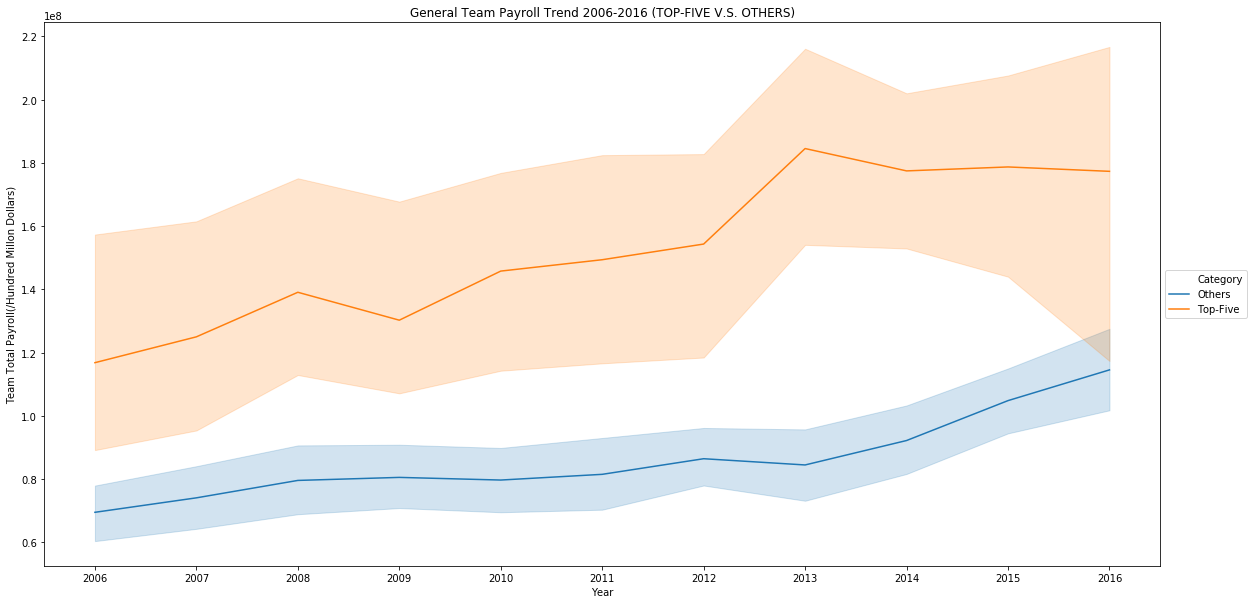

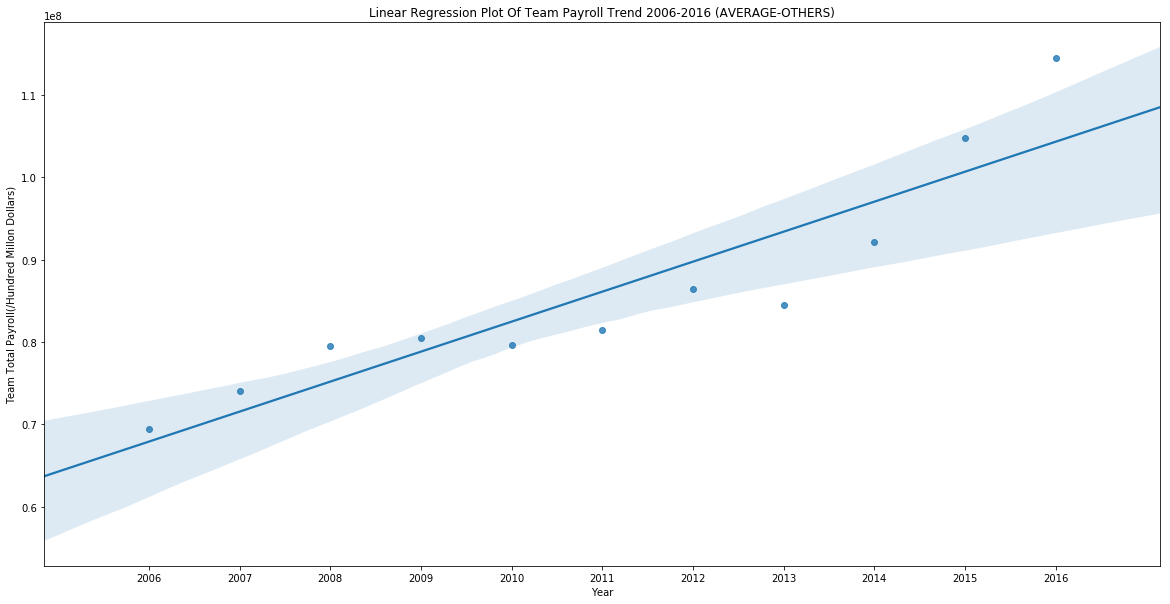

In [367]:
# 1.Plot a lineplot that reflect the general trend of top five teams
plt.figure(figsize=(20, 10))
ax2 = sns.lineplot("yearID", "team_salary", hue = "Category", data = data_all)
ax2.set_title("General Team Payroll Trend 2006-2016 (TOP-FIVE V.S. OTHERS)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Team Total Payroll(/Hundred Millon Dollars)")

# Adjust the legend
for name in ax.get_xticklabels():
    name.set_rotation("vertical")
ax2.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Show full range of Years
ax2.set_xticks(range(2006,2017))
ax2

# 2.Plot a Regression-plot that reflect the general trend of total average of other teams
plt.figure(figsize=(20, 10))
ax_lm2 = sns.regplot("yearID", "team_avg_payroll", data = data_other)

# Add plot titles
ax_lm2.set_title("Linear Regression Plot Of Team Payroll Trend 2006-2016 (AVERAGE-OTHERS)")
ax_lm2.set_xlabel("Year")
ax_lm2.set_ylabel("Team Total Payroll(/Hundred Millon Dollars)")

# Show full range of Years
ax_lm2.set_xticks(range(2006,2017))
ax_lm2

### *Trend Comparison:

**By analyzing the above lineplot which compares the top-five teams with other teams, we could observe there exist several similarities between two groups and we could also discover some siginificant difference.**

**(1) Similarity: Generally, we find that as years grow, both for top-five teams and the other ones, their team payrolls is also increasing simultanouesly. Recall the linear regression plot for top-five teams in 1.1.2, We may discover that the other teams' payroll is consistent with the relationship. It is an approximately positive linear regression between years and payroll values.**

**(2) Difference: While the growth path of other teams payrolls is quite different from that of the top-five teams. We would observe that there are more large fluctuations in payroll growth over the time period for the top-five teams (2006-2016). However, when comparing to other teams, we could find their growth is increasing gently and progressively. Between each years, there are less huge value fluctuations. Moreover, we find that the team payrolls tend to increase quickly in the early years (2006-2013). At this time, the growth of payrolls of other teams are not siginificant. However, the payroll of other teams is increasing comparatively fast in the recent time (2013-2016). While at this time interval, there is basicaly no growth in team payrolls for the top-five teams. One of the top five, "Philadelphia Phillies", even show a large and continuous decrease at the time.**

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

### 1.2.1 Are teams paying higher for their players truly help the team performance better? 

#### *Introduction: 

Is baseball game a pure competition about money? By researching the team payrolls previously, we may have a thought in mind that how team payrolls would affect the team performance. To establish a clear relationship between those two parametrs, we raise this question and focus the time interval between.

#### *Data Connection:

In [368]:
# To get the dataset for all teams with their team payrolls with wins.
# *1. We created a new temporary table called table_win.
result = db.execute("""
    CREATE TEMPORARY TABLE table_win AS
        SELECT a.teamID, a.team_salary, a.yearID, Teams.name, Teams.W FROM
                    (SELECT SUM(salary) AS team_salary, yearID, teamID FROM Salaries 
                        WHERE yearID BETWEEN 2006 AND 2016
                        GROUP BY yearID, teamID
                        ORDER BY yearID 
                     )  AS a
                 LEFT JOIN Teams
                 ON a.teamID=Teams.teamID and
                    a.yearID=Teams.yearID 
            """)

# Force the database to run ("commit") the query.
# Otherwise the database evaluates queries lazily, so the table will not show up.
db.commit()

In [369]:
# *2. We categorize the top-five teams and other teams inside this dataset.
data_win=pd.read_sql("""
            SELECT *, CASE WHEN NAME NOT IN
            ('New York Yankees','Detroit Tigers','Philadelphia Phillies',
            'Los Angeles Dodgers','Boston Red Sox')  
            THEN 'Others'
            ELSE 'Top-Five' END AS Category FROM table_win
""",db)

#### *Data Visualization

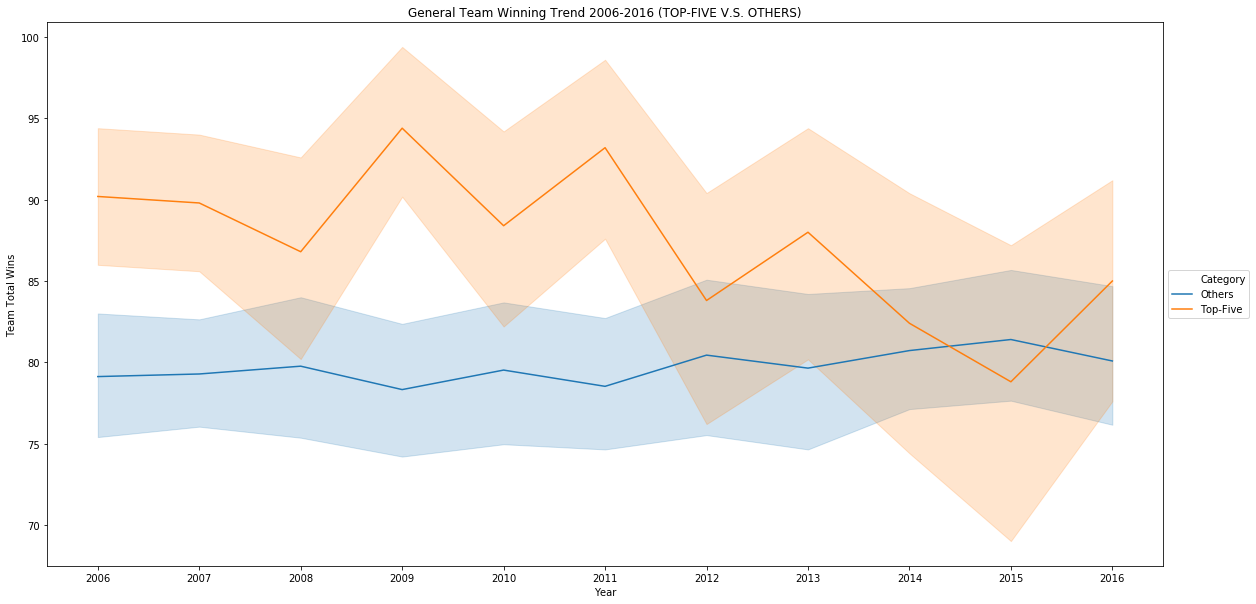

In [370]:
# 1.Plot a lineplot that reflect the general trend of top five teams
plt.figure(figsize=(20, 10))
ax3 = sns.lineplot("yearID", "W", hue = "Category", data = data_win)
ax3.set_title("General Team Winning Trend 2006-2016 (TOP-FIVE V.S. OTHERS)")
ax3.set_xlabel("Year")
ax3.set_ylabel("Team Total Wins")

# Adjust the legend
for name in ax.get_xticklabels():
    name.set_rotation("vertical")
ax3.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Show full range of Years
ax3.set_xticks(range(2006,2017))
ax3

#### *Trend Discussion:

As we explore the relationship between team payrolls and winns, we still follow the above research path and categorize the all 30 MLB teams into 2 category. One is the top-five teams with the highest team payrolls each year and the remainded part is for the other teams. The reason why we want to seperate the teams into two category is that we hope to see if a team invest more money, whether this team would win more games. To clearly represent the trend of wins, we created a lineplot follow by the years from 2006 to 2016. We summarized several important features below.

Generally, we observe that the average winnings of top-five teams is higher than those of other teams in most of years under our time period. We would find that from 2006 to 2014, the average winning line of top-five teams is continuously above the line for other teams, indicating those high-investment teams tend to have more games winning compare to the teams which pay less than them. However, this is not the whole story. We could obviously see that the fluctuations of both groups are large. There exist multiple overlaps in the lineplot. Moreover, by looking through the trend, we see that the winning-line of top-five teams is under a decresing tendency as the years grows. In the recent time (2014-2016), the average number of winning games of top-five teams is even surpassed by that of the other teams. The fact strongly suggested that higher investment is not the most siginificant factor that affect a team to win. While looking through the trend of other teams, we found the average winning games of this group is keep increasing as the years passed. The differece between less-paying team and the top-five teams became smaller and smaller. Besides, the overall flucations of less-paying teams are also smaller than the top-five teams. In this way, we may conclude that the high investment plays a role in helping a team to win, but it would not be the most important factor that affect a team's good performance in the MLB. 

As we gave the previous conclusion, we seek other resourse that could help explain the question. Beyond human captial, we understand that there is different pressure level that every MLB team need to concern about. A team would have problems in different areas, such as players and fans, manager decisions, coach arrangements and etc. Those factor would indeed affect the team performance and finally decide the games result of a team. More specifically, Jason Stark also mentioned "MLB teams did not have enough reward for being great." This means even you have the strongest team in the leagure with lots of marquee players, the advantage this team could obtain would not strongly help them to win. In this way, we could also conclude that the money is not the key factor which improve a team's performance. 







***Related links:**
.[Why superteams don't win the World Series](http://www.espn.com/mlb/story/_/page/playoffs16_whydontthebestteamswinitall/why-difficult-best-mlb-teams-win-all)&nbsp;
.[What determine baseball to win](https://www.iwu.edu/economics/PPE13/houser.pdf)

### 1.2.2 How is the general payroll trend of MLB players from 2006 to 2016? (Is there a difference between two leagues?)


#### *Introduction:

As we explored the payrolls for every team in MLB over ten yearsa, we discovered that some important patterns of how payrolls affect a team. While now, we want to stand on the players' perspective and analyze how players payrolls change over the same time interval. We would also compare the two exploration results together.

#### *Data Connection

In [371]:
# Data top_five team payrolls:
data_ply=pd.read_sql("""
                    SELECT AVG(salary) AS player_salary, yearID, lgID FROM Salaries 
                        WHERE yearID BETWEEN 2006 AND 2016
                        GROUP BY yearID, lgID
                        ORDER BY yearID 
                     """ , db)

#### *Data Visulization:

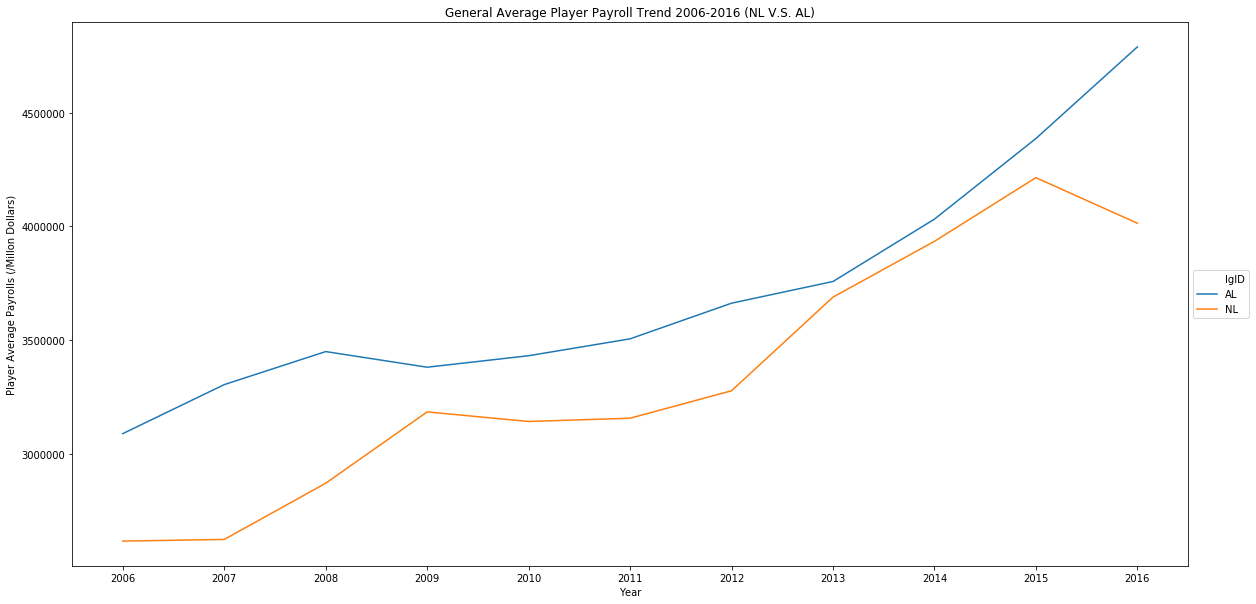

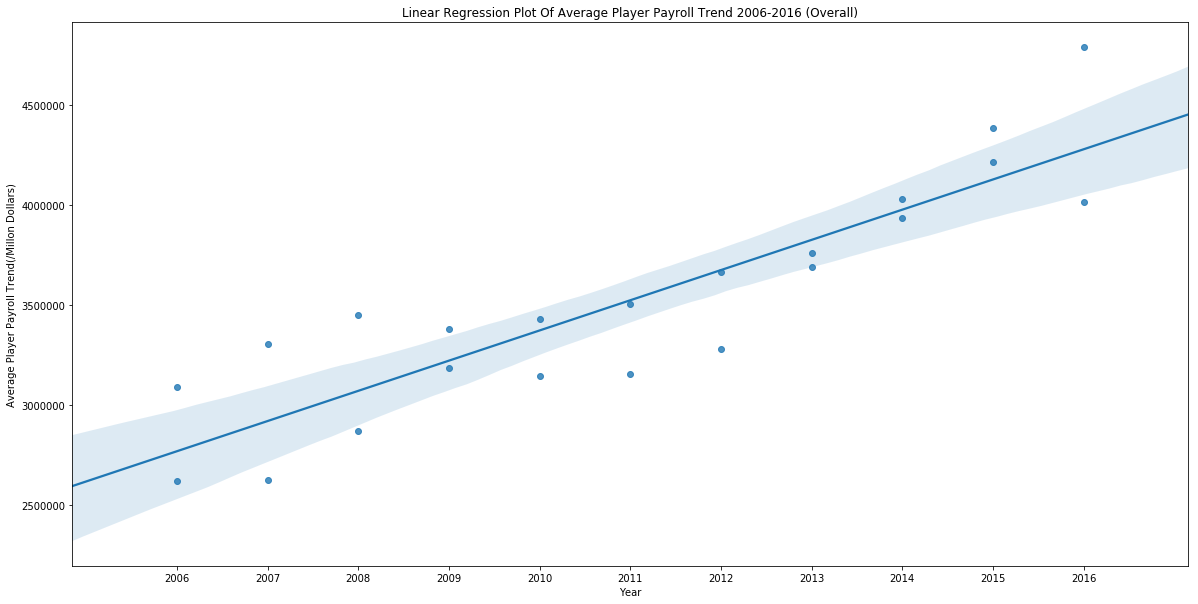

In [372]:
# 1.Plot a lineplot that reflect the general trend of top five teams
plt.figure(figsize=(20, 10))
ax4 = sns.lineplot("yearID", "player_salary", hue = "lgID", data = data_ply)
ax4.set_title("General Average Player Payroll Trend 2006-2016 (NL V.S. AL)")
ax4.set_xlabel("Year")
ax4.set_ylabel("Player Average Payrolls (/Millon Dollars)")

# Adjust the legend
for name in ax.get_xticklabels():
    name.set_rotation("vertical")
ax4.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Show full range of Years
ax4.set_xticks(range(2006,2017))
ax4

# 2.Plot a Regression-plot that reflect the general trend of total average of other teams
plt.figure(figsize=(20, 10))
ax_lm3 = sns.regplot("yearID", "player_salary", data = data_ply)

# Add plot titles
ax_lm3.set_title("Linear Regression Plot Of Average Player Payroll Trend 2006-2016 (Overall)")
ax_lm3.set_xlabel("Year")
ax_lm3.set_ylabel("Average Player Payroll Trend(/Millon Dollars)")

# Show full range of Years
ax_lm3.set_xticks(range(2006,2017))
ax_lm3

#### *Trend Discussion:

Unlike NBA west and east conferences, the two leagues in MLB maintain some siginifiant difference among their match rules, organizations and compositions. Therefore, we explore the players payrolls of two leagures individually and we compared them over the same time inveral. Through analysis, we discovered several important similarities and differences. Accordingly, we summarized them below.

First of all, as we look through the trend in above line plot, we could easily discover that both for AL and NL players, their average payroll is increasing as years grows. To be more precise, we mapped a linear regression plot between players' payrolls and year time. We found that there is approximately postive linear relationship between the average players payroll and years, which supported our initial statement. Furthermore, we could see the growth in two leagues maintain a same track. In the early years (2006-2012), the average player payrolls are increasing slowly both in AL and NL. However, as time passed, this growth is become faster than before. Although the growth speed for two leagure is different, their increasing pattern follow the similar way.  

As we mentioned before, both average player payrolls of two leagues are increasing as years grow. However, there is also a huge difference. By checking the details of the lineplot, we found that the average player payrolls of American league is always higher than that of National league. The fact suggested us that players in AL are likely to earn more than National league. Nevertheless, as we compare the growth speed of player payrolls over the time period, we also discovered that the growth speed of AL is faster than NL in most of time, indicating American league a superior League over National league. To concrete this conclusion, we seek some additional resource from website.

Through inverstigating, we found that compared to Natioal league, American league have some improved features that lead them a stronger leagure between the two. First, American League applied a different rule in pitching. Unlike the tradional rule of National league, this change make the base games more exciting and it let teams and players be able to have more excellent performance during the match. Therefore, more baseball fans are attracted by the AL games and this help the AL to grows. Second, we found there are more competitive baseball teams in American League than National League. We saw several strongest teams through the history are belonged to the AL, such as "Boston Red Sox" and "Los angeles Dodgers". Those "big teams" are more willing to give large contract to players to improve their teams. Thererfore, it help improve the whole average player payrolls inside the league. Last, we found the organization of AL is better than that of NL. It also help the leagure to be more stronger in building a good system in baseball matches. In this way, we may understand why the average players payroll in AL is more than those in NL.

***Related links:**
.[What's the difference between the American and National Baseball Leagues?](https://entertainment.howstuffworks.com/american-vs-national-baseball-league.htm)&nbsp;
.[Which Is Baseball's Superior Overall League, the AL or the NL?](https://bleacherreport.com/articles/1654175-what-is-baseballs-superior-overall-league-the-al-or-the-nl)

### 1.2.3  Which college cultivates the most awardsplayers in MLB over recent 50 years?

#### *Introduction

We all have this common sense, "A good preparation could lead to the success." College team and matches will play a very important role in developing one player's sports career. Baseball players also follow this tradition. People know "Duke" and  "Oregon State" are famous for basketball. However, what about baseball? We hope to find which college is the best one in US. To analyze this feature, We are going to find how many great players a college cultivate through 50 years(1966-2016).

#### *Data Connection:

#### step1. Create a temporary table that contains awards players and their colleges

In [395]:
result = db.execute("""
    CREATE TEMPORARY TABLE table_aws AS
        SELECT new.playerID, s.name_full AS University FROM
          (SELECT DISTINCT pl.playerID, cp.schoolID FROM 
              (SELECT DISTINCT playerID FROM AwardsPlayers
                  WHERE yearID BETWEEN 1966 AND 2016) AS pl
               LEFT JOIN CollegePlaying AS cp
               ON pl.playerID=cp.playerID) AS new
        INNER JOIN Schools AS s
        ON new.schoolID=s.schoolID
        """)

# Force the database to run ("commit") the query.
# Otherwise the database evaluates queries lazily, so the table will not show up.
db.commit()

#### step2. Sort out the college with most awards players (top-10)

In [398]:
data_uni=pd.read_sql("""
                    SELECT University, COUNT(University) AS Awards_Freq FROM table_aws
                    GROUP BY University
                    ORDER BY Awards_Freq DESC
                    LIMIT 10
                     """ , db)

#### *College Result:

In [399]:
# Print the top-ten teams names and related informations.
data_uni

,University,Awards_Freq
0,Arizona State University,15
1,University of Michigan,9
2,University of Southern California,9
3,"University of California, Los Angeles",8
4,Georgia Institute of Technology,7
5,Mississippi State University,6
6,University of Arkansas,6
7,University of Miami,6
8,Auburn University,5
9,Michigan State University,5


#### *Data Visualization:

Text(0, 0.5, 'University')

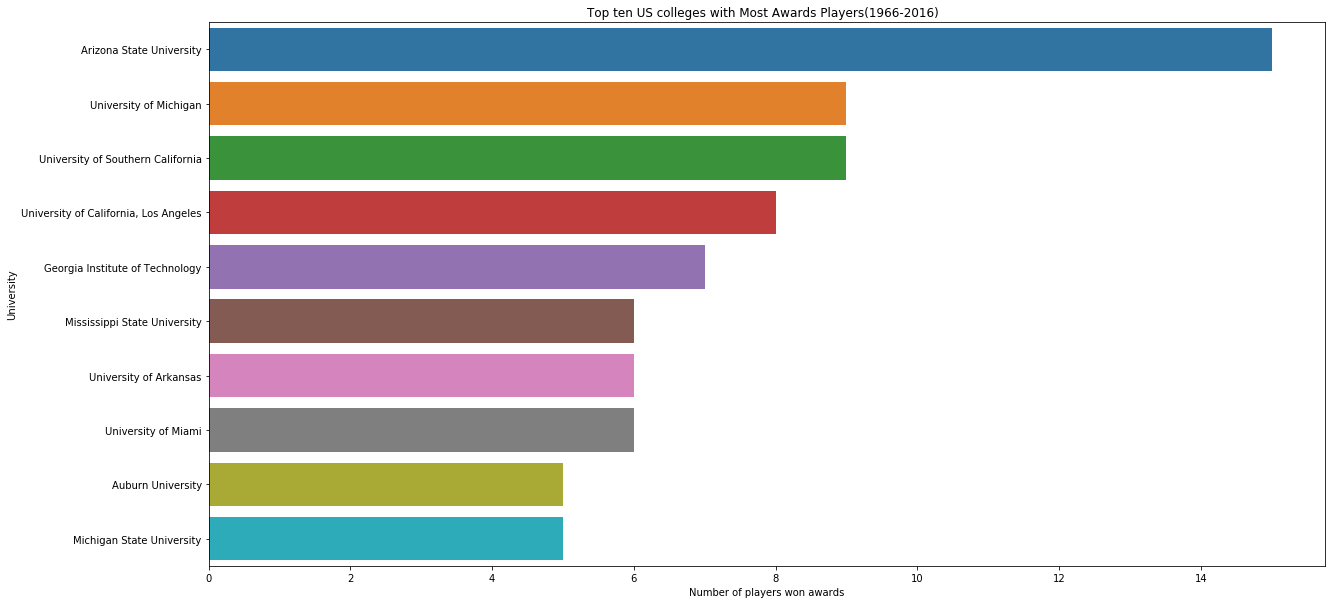

In [400]:
plt.figure(figsize=(20, 10))
ax5 = sns.barplot(x="Awards_Freq", y="University", data=data_uni)
ax5.set_title("Top ten US colleges with Most Awards Players(1966-2016)  ")
ax5.set_xlabel("Number of players won awards")
ax5.set_ylabel("University")

#### *Trend Discussion:

To compare the colleges which contains the most awards players, we use a barplot to visualize our data. As we previously ordered the dataset by number of players who win the awards, we could clearly observe that Arizona State University has the most awards players in recent 50 years(15 players). It follows by the University of Michigan (9 players) and Univeristy of South California (9 players). Both are strong college baseball teams in Unites States. Since the number of awards players from Arizona State Universit is far larger than the second and third colleges, we can conclude that the Arizona State University has the best college base ball team in recent 50 years of America. To fulfill our conclusion, we searched additional resource online and summarized them below. 

The baseball team of Arizona State University is called Arizona State Sun Devils baseball program, which is certainly one of the world-class and most successful baseball team among US colleges. It is also the second team which produce the most players in MLB. There are a great of number starplayers in the leagure once played for Sun Devils. Through researching, we found this team has several crucial advantages that make them great. First, the team has won five times national champions and cultivate strongest figures in baseball history like Dustin Pedroia, Andre Ethier, Bob Horner, Rick Monday, and Reggie Jackson. Besides, the coach and training systems of Sun Devils are in extremyly high standard compare to other colleges. We would most of team coaches of Arizona State University are used to be the major players in MLB. Furthermore, we observed that the team has a large fan base in US. This indicates the team has a long and successful impact which attract people to support them. Because of these strict standards in training and wonderful team achievements through history, the baseball team of Arizona State University(Sun Devils) could definitely considered as one of the best college team in US.

***Related links:**
.[Arizona State Sun Devils baseball](https://en.wikipedia.org/wiki/Arizona_State_Sun_Devils_baseball)&nbsp;
.[ASU baseball](http://www.statepress.com/article/2018/02/spopinion-asu-baseball-is-still-one-of-the-best-programs-in-the-country)

###  *Close Database

In [378]:
db.close()